In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance/insurance.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.optimizers import Adam
from xgboost import XGBRFRegressor

In [3]:
data = pd.read_csv('/kaggle/input/insurance/insurance.csv')

# <span style="color:#000; font-size:1.5em;">Analyze the Data</span>


In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


<p style="color:#339999; font-size:1.5em;">
    <b>Columns (Features) in the DataSet</b>
</p>

In [5]:
list_of_columns = list(data.columns)
list_of_columns

['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges']

<p style="color:#339999; font-size:1.5em;">
    <b>Information about the DataSet</b>
</p>

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<p style="color:#339999; font-size:1.5em;">
    <b>Summary of the DataSet</b>
</p>

In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<p style="color:#339999; font-size:1.5em;">
    <b>Replace individual BMI values into Standard BMI categories</b>
</p>

In [8]:
bmi_category = []
for value in data['bmi']:
    if value < 18.5:
        bmi_category.append('underweight')
    elif value>= 18.5 and value < 25:
        bmi_category.append('Healthy')
    elif value>= 25 and value < 30:
        bmi_category.append('overweight')
    elif value>= 30 and value < 35:
        bmi_category.append('Class 1 Obesity')
    elif value>= 35 and value < 40:
        bmi_category.append('Class 2 Obesity')
    else:
        bmi_category.append('Class 3 Obesity')

In [9]:
data['bmi'] = bmi_category
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,overweight,0,yes,southwest,16884.92400
1,18,male,Class 1 Obesity,1,no,southeast,1725.55230
2,28,male,Class 1 Obesity,3,no,southeast,4449.46200
3,33,male,Healthy,0,no,northwest,21984.47061
4,32,male,overweight,0,no,northwest,3866.85520


<p style="color:#339999; font-size:1.5em;">
    <b>Plots of Features and Categories with their Frequencies</b>
</p>

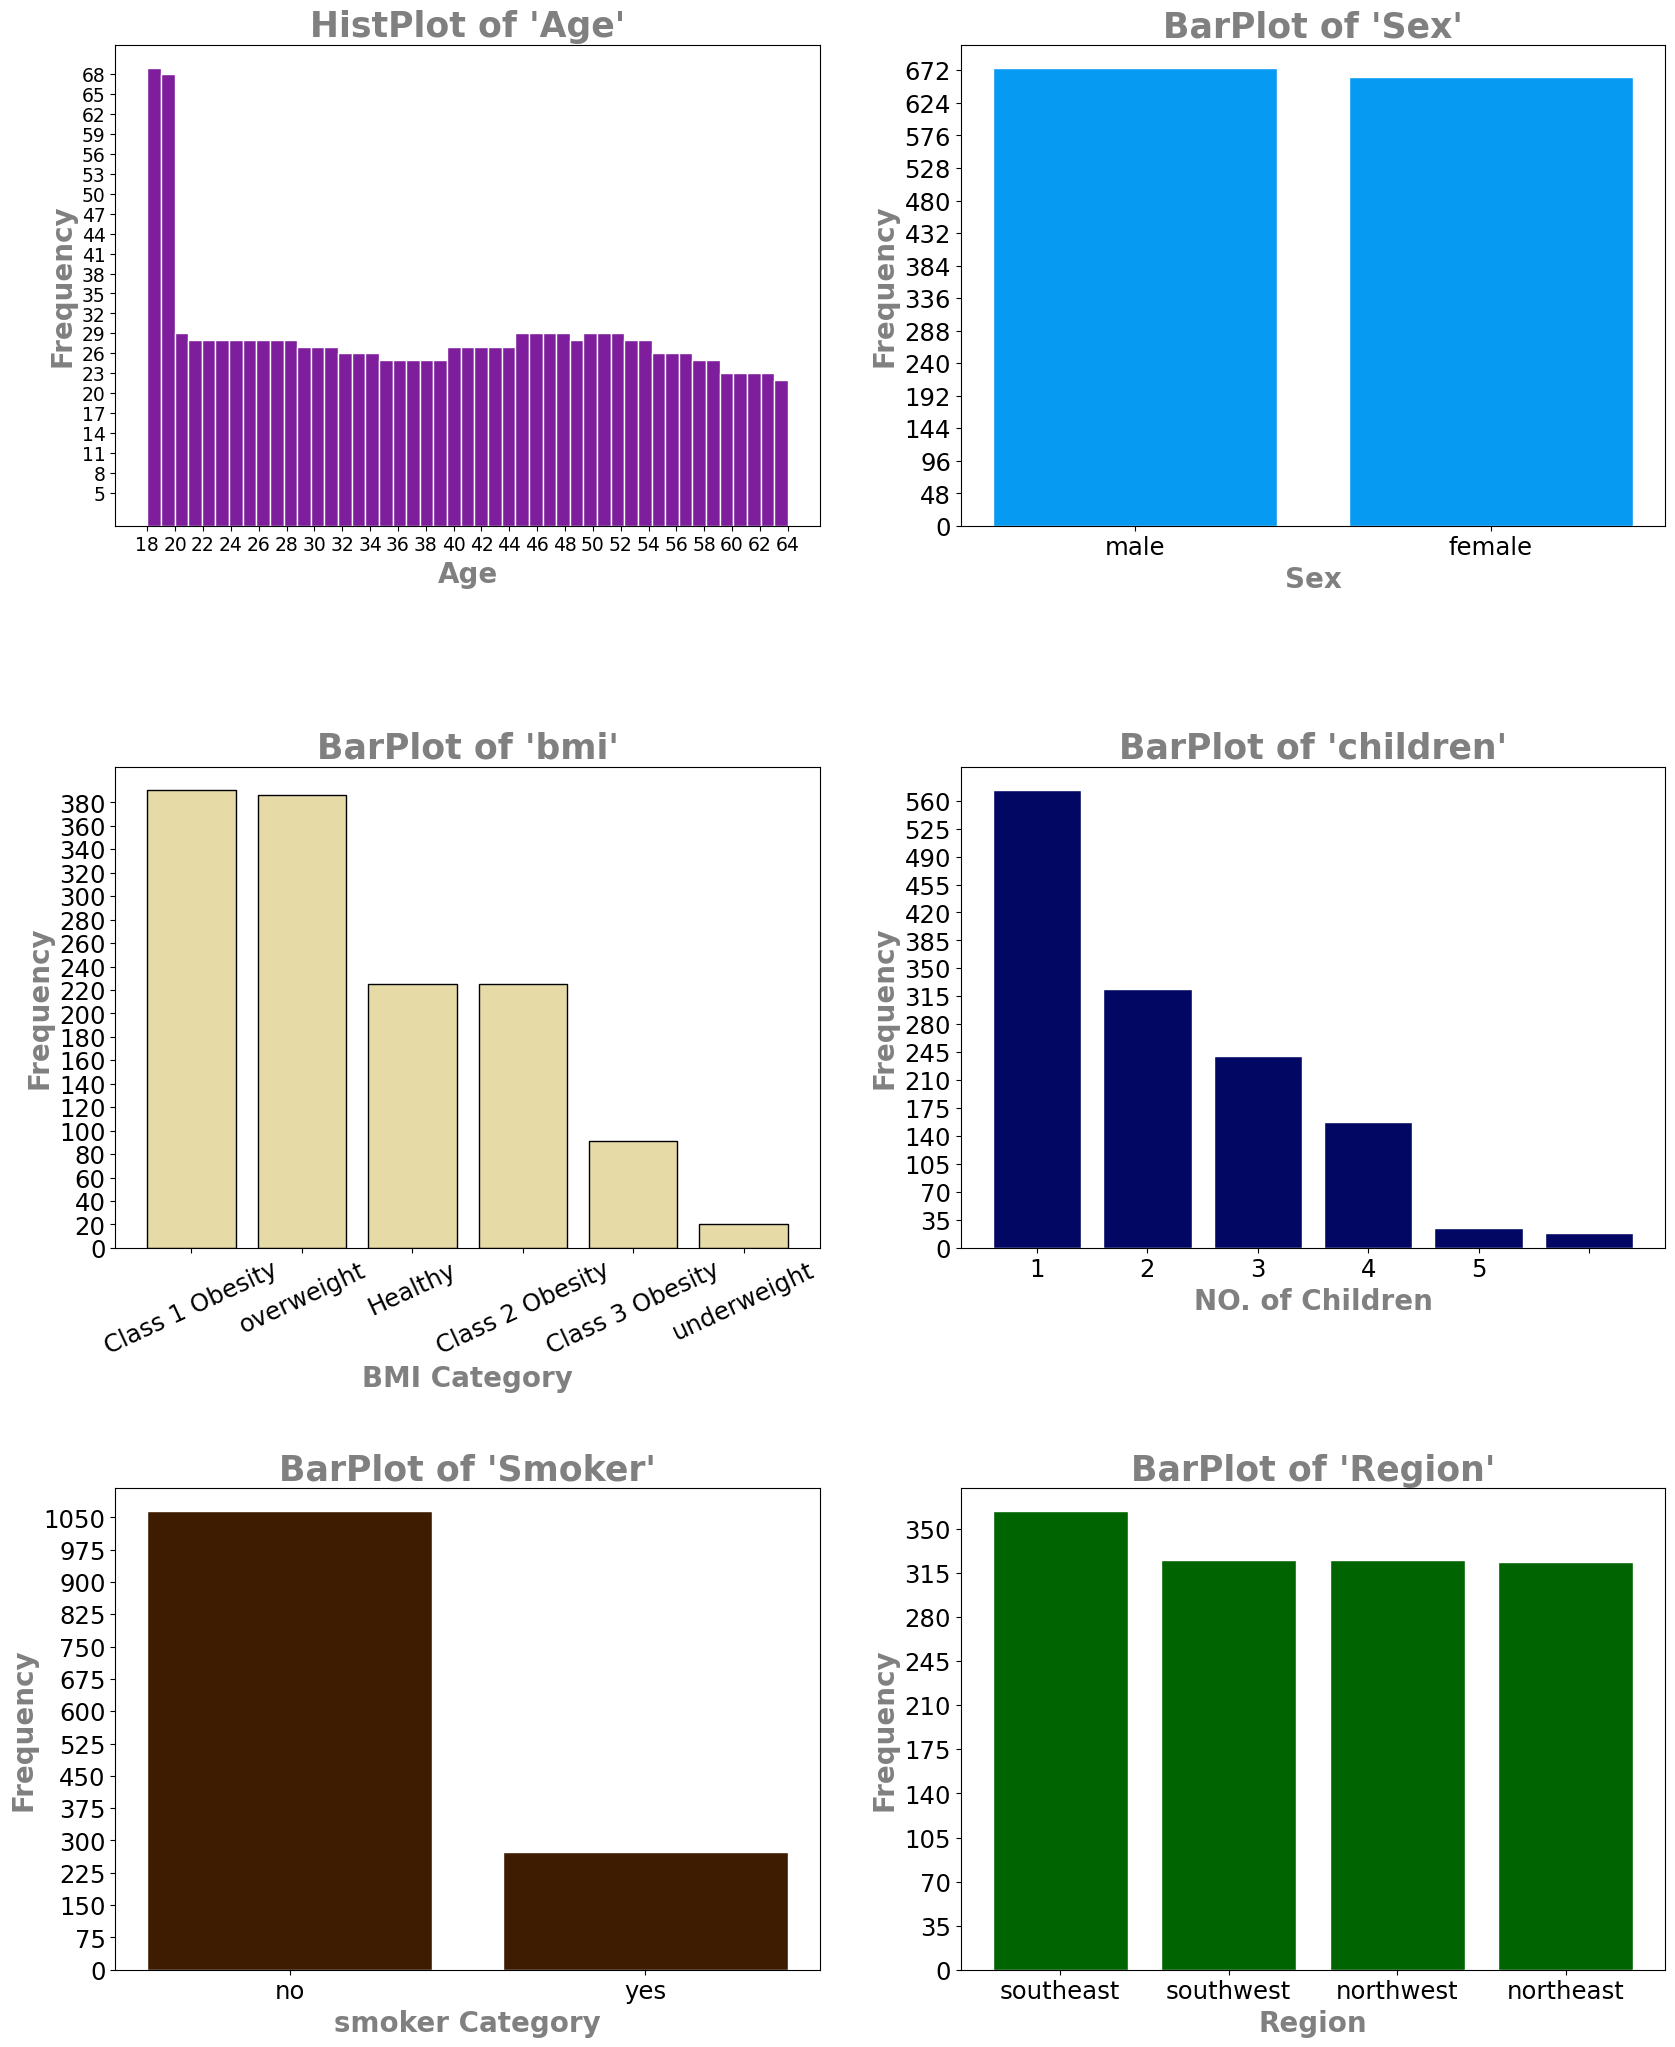

In [10]:
warnings.filterwarnings('ignore')

plt.figure
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(20, 25))

axs[0,0].hist(data['age'],bins=47,edgecolor='White',color='#7E1E9C')
axs[0,0].set_title('HistPlot of \'Age\'',fontsize=25,fontweight='bold',color='Gray')
axs[0,0].set_xlabel('Age',fontsize=20,fontweight='bold',color='Gray')
axs[0,0].set_xticks(np.arange(18,max(data['age'].value_counts().index)+2,2))
axs[0,0].set_ylabel('Frequency',fontsize=20,fontweight='bold',color='Gray')
axs[0,0].set_yticks(np.arange(5,max(data['age'].value_counts().values),3))
axs[0,0].tick_params(axis='x', labelsize=13.5)
axs[0,0].tick_params(axis='y', labelsize=13.5)

axs[0,1].bar(data['sex'].value_counts().index,data['sex'].value_counts().values,edgecolor='white',color='#069AF3')
axs[0,1].set_title('BarPlot of \'Sex\'',fontsize=25,fontweight='bold',color='Gray')
axs[0,1].set_xlabel('Sex',fontsize=20,fontweight='bold',color='Gray')
axs[0,1].set_ylabel('Frequency',fontsize=20,fontweight='bold',color='Gray')
axs[0,1].set_yticks(np.arange(0,max(data['sex'].value_counts().values),48))
axs[0,1].tick_params(axis='x', labelsize=17.5)
axs[0,1].tick_params(axis='y', labelsize=17.5)

axs[1,0].bar(data['bmi'].value_counts().index,data['bmi'].value_counts().values,edgecolor='black',color='#E6DAA6')
axs[1,0].set_title('BarPlot of \'bmi\'',fontsize=25,fontweight='bold',color='Gray')
axs[1,0].set_xlabel('BMI Category',fontsize=20,fontweight='bold',color='Gray')
axs[1,0].set_xticklabels(data['bmi'].value_counts().index,rotation=25)
axs[1,0].set_ylabel('Frequency',fontsize=20,fontweight='bold',color='Gray')
axs[1,0].set_yticks(np.arange(0,max(data['bmi'].value_counts().values),20))
axs[1,0].tick_params(axis='x', labelsize=17.5)
axs[1,0].tick_params(axis='y', labelsize=17.5)

axs[1,1].bar(data['children'].value_counts().index,data['children'].value_counts().values,edgecolor='white',color='#030764')
axs[1,1].set_title('BarPlot of \'children\'',fontsize=25,fontweight='bold',color='Gray')
axs[1,1].set_xlabel('NO. of Children',fontsize=20,fontweight='bold',color='Gray')
axs[1,1].set_xticklabels(data['children'].value_counts().index,rotation=0)
axs[1,1].set_ylabel('Frequency',fontsize=20,fontweight='bold',color='Gray')
axs[1,1].set_yticks(np.arange(0,max(data['children'].value_counts().values),35))
axs[1,1].tick_params(axis='x', labelsize=17.5)
axs[1,1].tick_params(axis='y', labelsize=17.5)

axs[2,0].bar(data['smoker'].value_counts().index,data['smoker'].value_counts().values,edgecolor='white',color='#3D1C02')
axs[2,0].set_title('BarPlot of \'Smoker\'',fontsize=25,fontweight='bold',color='Gray')
axs[2,0].set_xlabel('smoker Category',fontsize=20,fontweight='bold',color='Gray')
axs[2,0].set_xticklabels(data['smoker'].value_counts().index,rotation=0)
axs[2,0].set_ylabel('Frequency',fontsize=20,fontweight='bold',color='Gray')
axs[2,0].set_yticks(np.arange(0,max(data['smoker'].value_counts().values),75))
axs[2,0].tick_params(axis='x', labelsize=17.5)
axs[2,0].tick_params(axis='y', labelsize=17.5)

axs[2,1].bar(data['region'].value_counts().index,data['region'].value_counts().values,edgecolor='white',color='#006400')
axs[2,1].set_title('BarPlot of \'Region\'',fontsize=25,fontweight='bold',color='Gray')
axs[2,1].set_xlabel('Region',fontsize=20,fontweight='bold',color='Gray')
axs[2,1].set_xticklabels(data['region'].value_counts().index,rotation=0)
axs[2,1].set_ylabel('Frequency',fontsize=20,fontweight='bold',color='Gray')
axs[2,1].set_yticks(np.arange(0,max(data['region'].value_counts().values),35))
axs[2,1].tick_params(axis='x', labelsize=17.5)
axs[2,1].tick_params(axis='y', labelsize=17.5)

plt.subplots_adjust(hspace=0.5)
plt.show()

# <span style="color:#000; font-size:1.5em;">Convert All Features to Numeric Datatype And find Corellations</span>


In [11]:
data_numeric = pd.get_dummies(data,drop_first = True)
data_numeric.head()

,age,children,charges,sex_male,bmi_Class 2 Obesity,bmi_Class 3 Obesity,bmi_Healthy,bmi_overweight,bmi_underweight,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,0,16884.92400,0,0,0,0,1,0,1,0,0,1
1,18,1,1725.55230,1,0,0,0,0,0,0,0,1,0
2,28,3,4449.46200,1,0,0,0,0,0,0,0,1,0
3,33,0,21984.47061,1,0,0,1,0,0,0,1,0,0
4,32,0,3866.85520,1,0,0,0,1,0,0,1,0,0


<p style="color:#339999; font-size:1.5em;">
    <b>Seperating Inputs and Outputs</b>
</p>

In [12]:
X = data_numeric.drop(columns='charges')
Y = data_numeric['charges']

<p style="color:#339999; font-size:1.5em;">
    <b>Calculating Corellations</b>
</p>

In [13]:
Input_with_Output_Corellation = X.corrwith(Y)
Inputs_Corellation = X.corr()
Inputs_Output_Corellation = data_numeric.corr()

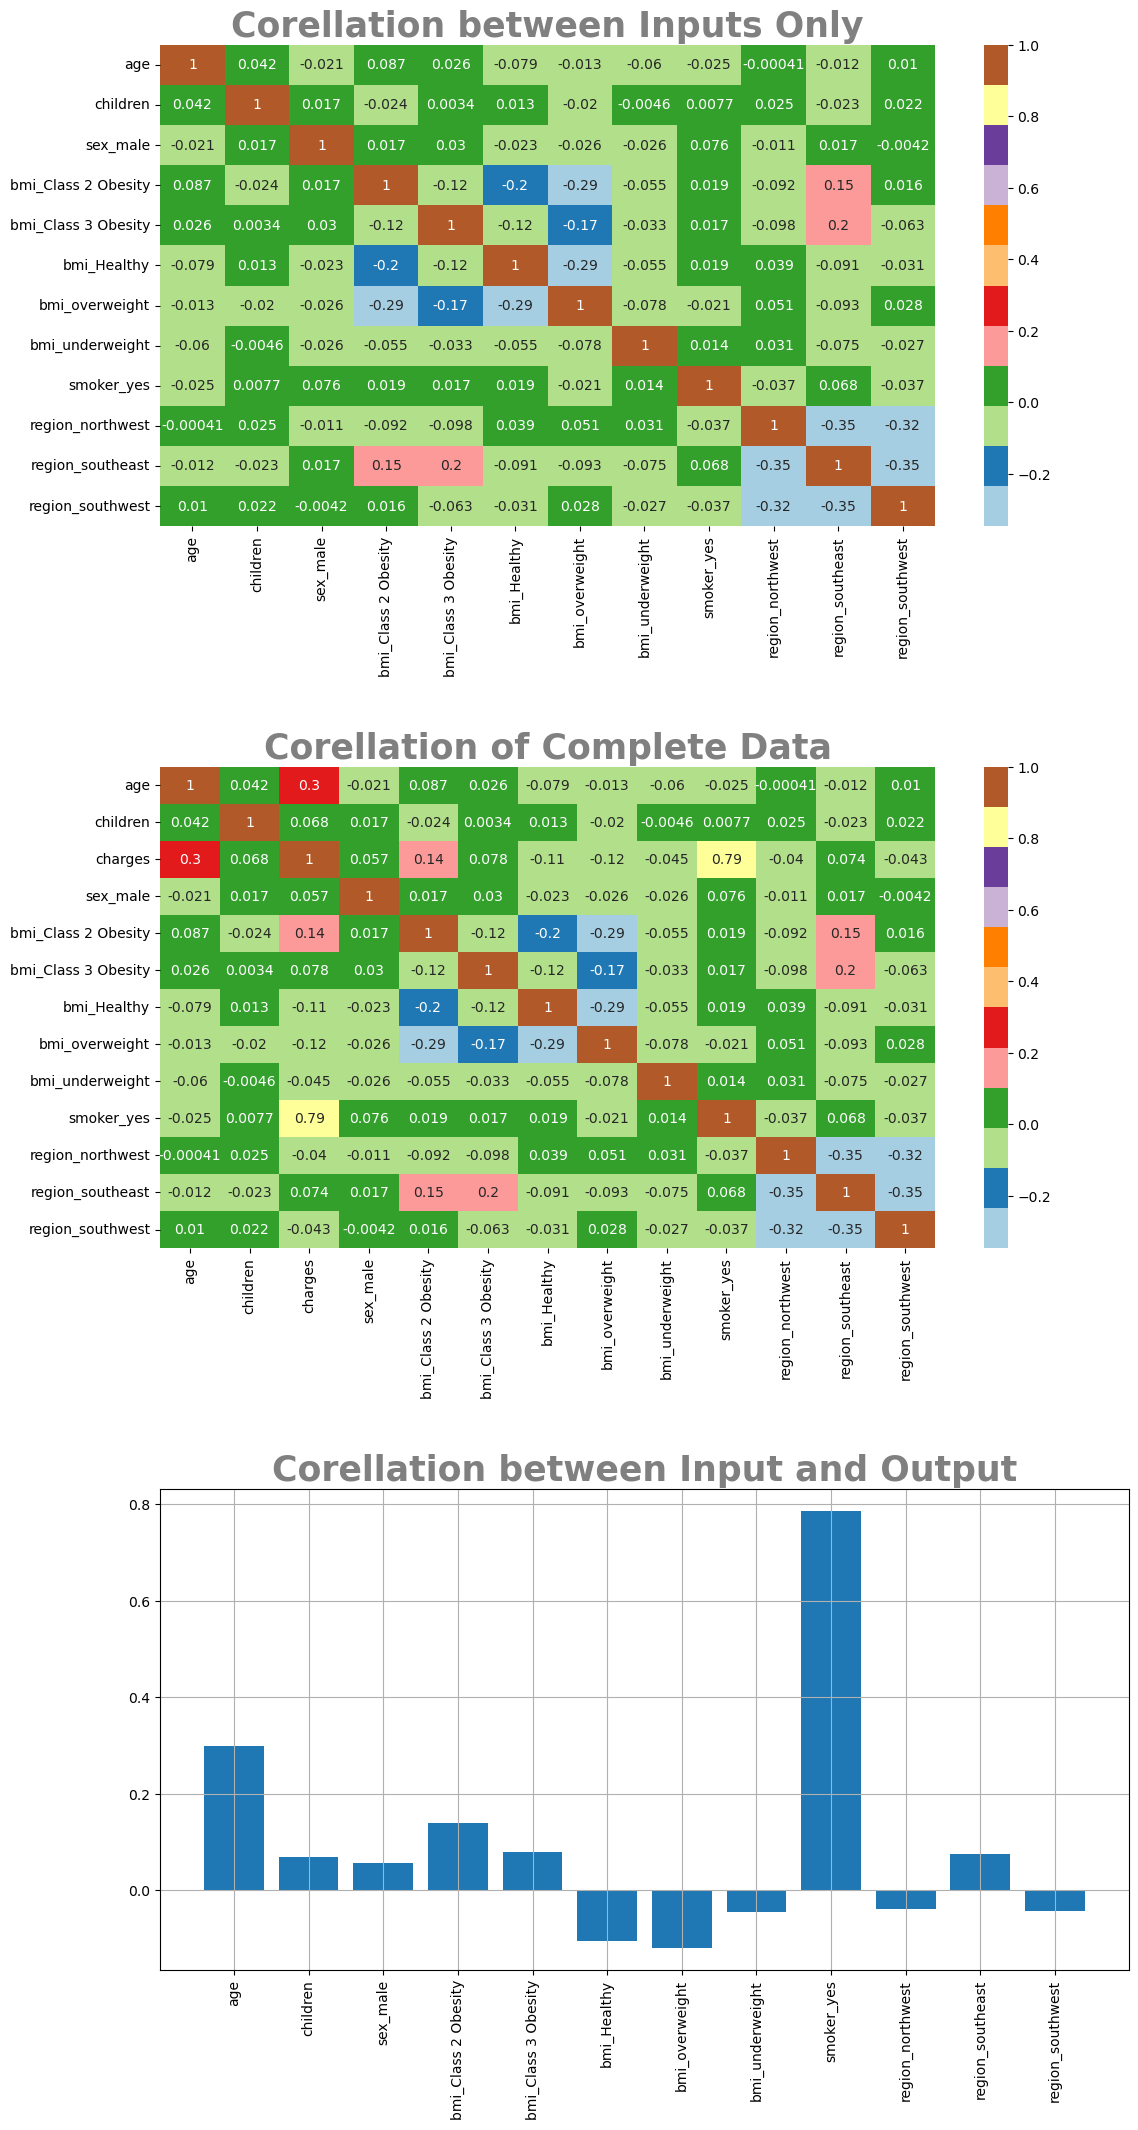

In [14]:
warnings.filterwarnings('ignore')

plt.figure
fig, axs = plt.subplots(3, 1, figsize=(12.5, 25))
sns.heatmap(Inputs_Corellation,ax=axs[0],cmap='Paired',annot=True)
axs[0].tick_params(axis='x', labelsize=10)
axs[0].tick_params(axis='y', labelsize=10)
axs[0].set_title('Corellation between Inputs Only',fontsize=25,fontweight='bold',color='Gray')

sns.heatmap(Inputs_Output_Corellation,ax=axs[1],cmap='Paired',annot=True)
axs[1].tick_params(axis='x', labelsize=10)
axs[1].tick_params(axis='y', labelsize=10)
axs[1].set_title('Corellation of Complete Data',fontsize=25,fontweight='bold',color='Gray')

axs[2].bar(x = Input_with_Output_Corellation.index, height = Input_with_Output_Corellation.values)
axs[2].set_xticklabels(Input_with_Output_Corellation.index,rotation=90)
axs[2].set_title('Corellation between Input and Output',fontsize=25,fontweight='bold',color='Gray')

plt.subplots_adjust(hspace=0.5)
plt.grid(True)

plt.show()

# <span style="color:#000; font-size:1.5em;">Create Train and Test Sets and Create Models</span>


In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.15,random_state=3)

In [16]:
sizes = { 'X_train' : str(X_train.shape),
          'Y_train' : str(Y_train.shape),
          'X_test' : str(X_test.shape),
          'Y_test' : str(Y_test.shape)}
pd.DataFrame(sizes,index=['Sizes'])

,X_train,Y_train,X_test,Y_test
Sizes,"(1137, 12)","(1137,)","(201, 12)","(201,)"


In [17]:
X_train_S = StandardScaler().fit_transform(X_train)
X_test_S = StandardScaler().fit_transform(X_test)

<p style="color:#339999; font-size:1.75em;">
    <b>Linear Regression</b>
</p>

In [18]:
Linear_Regression_Model = LinearRegression()
Linear_Regression_Model.fit(X_train_S,Y_train)

LinearRegression()

In [19]:
Linear_Regression_fit_evaulation = {'Linear Regression Fit Metrics':
                                    {'Coefficient':Linear_Regression_Model.coef_,
                                    'Intercept':Linear_Regression_Model.intercept_,
                                    'No. of Features':Linear_Regression_Model.n_features_in_,
                                    'R_squared score (Train)':Linear_Regression_Model.score(X_train_S,Y_train),
                                    'R_squared score (Test)':Linear_Regression_Model.score(X_test_S,Y_test)
                                    },
                                   }
Linear_Regression_fit_evaulation = pd.DataFrame(Linear_Regression_fit_evaulation)
Linear_Regression_fit_evaulation

,Linear Regression Fit Metrics
Coefficient,"[3591.119204514231, 705.3701779779607, -78.054..."
Intercept,13304.990819
No. of Features,12
R_squared score (Test),0.767792
R_squared score (Train),0.754066


In [20]:
LR_train_Pred = Linear_Regression_Model.predict(X_train_S)
LR_test_Pred = Linear_Regression_Model.predict(X_test_S)

In [21]:
Linear_Regression_prediction_evaulation = {'Train MSE': mean_squared_error(Y_train,LR_train_Pred),
                                           'Test MSE' : mean_squared_error(Y_test,LR_test_Pred),
                                           'Train RMSE': mean_squared_error(Y_train,LR_train_Pred,squared=False),
                                           'Test RMSE' : mean_squared_error(Y_test,LR_test_Pred,squared=False)}
Linear_Regression_prediction_evaulation = pd.DataFrame(Linear_Regression_prediction_evaulation,index=['Linear Regression Model Prediction Metrics'])
Linear_Regression_prediction_evaulation

,Train MSE,Test MSE,Train RMSE,Test RMSE
Linear Regression Model Prediction Metrics,3.578591e+07,3.537462e+07,5982.132972,5947.656262


<p style="color:#000; font-size:1.25em;">
    <b>Random Prediction</b>
</p>

In [22]:
random_integer = np.random.randint(1,202)
prediction_1 = Linear_Regression_Model.predict([list(X_test_S[random_integer,:])])
pd.DataFrame({'Predicted Y Value' : prediction_1,
              'Observed Y Value' : [Y_test.iloc[random_integer]]})

,Predicted Y Value,Observed Y Value
0,6211.88643,1917.3184


<p style="color:#339999; font-size:1.75em;">
    <b>Polynomial Regression</b>
</p>

In [23]:
Polynomial_Features = PolynomialFeatures(2,include_bias=False)
Polynomial_Regression_Model = LinearRegression()
Polynomial_Regression_Model.fit(Polynomial_Features.fit_transform(X_train),Y_train)

LinearRegression()

In [24]:
Polynomial_Regression_fit_evaulation = {'Polynomial Regression Fit Metrics':
                                    {'Coefficient':Polynomial_Regression_Model.coef_,
                                    'Intercept':Polynomial_Regression_Model.intercept_,
                                    'No. of Features':Polynomial_Regression_Model.n_features_in_
                                    },
                                   }
Polynomial_Regression_fit_evaulation = pd.DataFrame(Polynomial_Regression_fit_evaulation)
Polynomial_Regression_fit_evaulation

,Polynomial Regression Fit Metrics
Coefficient,"[-87.85707262041528, 1415.4190643611462, -570...."
Intercept,4951.04294
No. of Features,90


In [25]:
PR_train_Pred = Polynomial_Regression_Model.predict(Polynomial_Features.fit_transform(X_train_S))
PR_test_Pred = Polynomial_Regression_Model.predict(Polynomial_Features.fit_transform(X_test_S))

In [26]:
Polynomial_Regression_prediction_evaulation = {'Train MSE': mean_squared_error(Y_train,PR_train_Pred),
                                           'Test MSE' : mean_squared_error(Y_test,PR_test_Pred),
                                           'Train RMSE': mean_squared_error(Y_train,PR_train_Pred,squared=False),
                                           'Test RMSE' : mean_squared_error(Y_test,PR_test_Pred,squared=False)}
Polynomial_Regression_prediction_evaulation = pd.DataFrame(Polynomial_Regression_prediction_evaulation,index=['Polynomial Regression Model Prediction Metrics'])
Polynomial_Regression_prediction_evaulation

,Train MSE,Test MSE,Train RMSE,Test RMSE
Polynomial Regression Model Prediction Metrics,2.039665e+09,2.182834e+09,45162.655573,46720.813068


<p style="color:#000; font-size:1.25em;">
    <b>Random Prediction</b>
</p>

In [27]:
random_integer = np.random.randint(1,202)
prediction_2 = Polynomial_Regression_Model.predict(Polynomial_Features.fit_transform([list(X_test_S[random_integer,:])]))
pd.DataFrame({'Predicted Y Value' : prediction_2,
              'Observed Y Value' : [Y_test.iloc[random_integer]]})

,Predicted Y Value,Observed Y Value
0,4390.999889,3594.17085


<p style="color:#339999; font-size:1.75em;">
    <b>XGBoost</b>
</p>

In [28]:
XGBoost = XGBRFRegressor(random_state=3)
XGBoost.fit(X_train_S,Y_train)


XGBRFRegressor(base_score=0.5, booster='gbtree', callbacks=None,
               colsample_bylevel=1, colsample_bytree=1,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
               importance_type=None, interaction_constraints='', max_bin=256,
               max_cat_to_onehot=4, max_delta_step=0, max_depth=6, max_leaves=0,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=0, num_parallel_tree=100,
               objective='reg:squarederror', predictor='auto', random_state=3,
               reg_alpha=0, sampling_method='uniform', scale_pos_weight=1, ...)

In [29]:
XGBoost_fit_evaulation = {'XGBoost Fit Metrics':
                                    {'Train Score':XGBoost.score(X_train_S,Y_train),
                                     'Test Score':XGBoost.score(X_test_S,Y_test)
                                    },
                                   }
XGBoost_fit_evaulation = pd.DataFrame(XGBoost_fit_evaulation)
XGBoost_fit_evaulation

,XGBoost Fit Metrics
Test Score,0.870464
Train Score,0.893711


<p style="color:#000; font-size:1.25em;">
    <b>Random Prediction</b>
</p>

In [30]:
random_integer = np.random.randint(1,202)
prediction_3 = XGBoost.predict([list(X_test_S[random_integer,:])])
pd.DataFrame({'Predicted Y Value' : prediction_3,
              'Observed Y Value' : [Y_test.iloc[random_integer]]})

,Predicted Y Value,Observed Y Value
0,21286.681641,19594.80965


# <span style="color:#339999; font-size:1.5em;">FINDINGS :</span>
<p style="color:#339999; font-size:1.25em;">
    <b>Among all the tested models, XGBoost gives the best results</b>
</p>